# Adding map features

Here we will showcase a few ways to add various features to a map.

Import the modules

In [1]:
import os

from polartoolkit import fetch, maps, regions, utils

In [2]:
# set default to southern hemisphere for this notebook
os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

In [3]:
ice_thickness = fetch.bedmap2(
    layer="thickness",
    region=regions.amery_ice_shelf,
)

Create a simple map with default settings

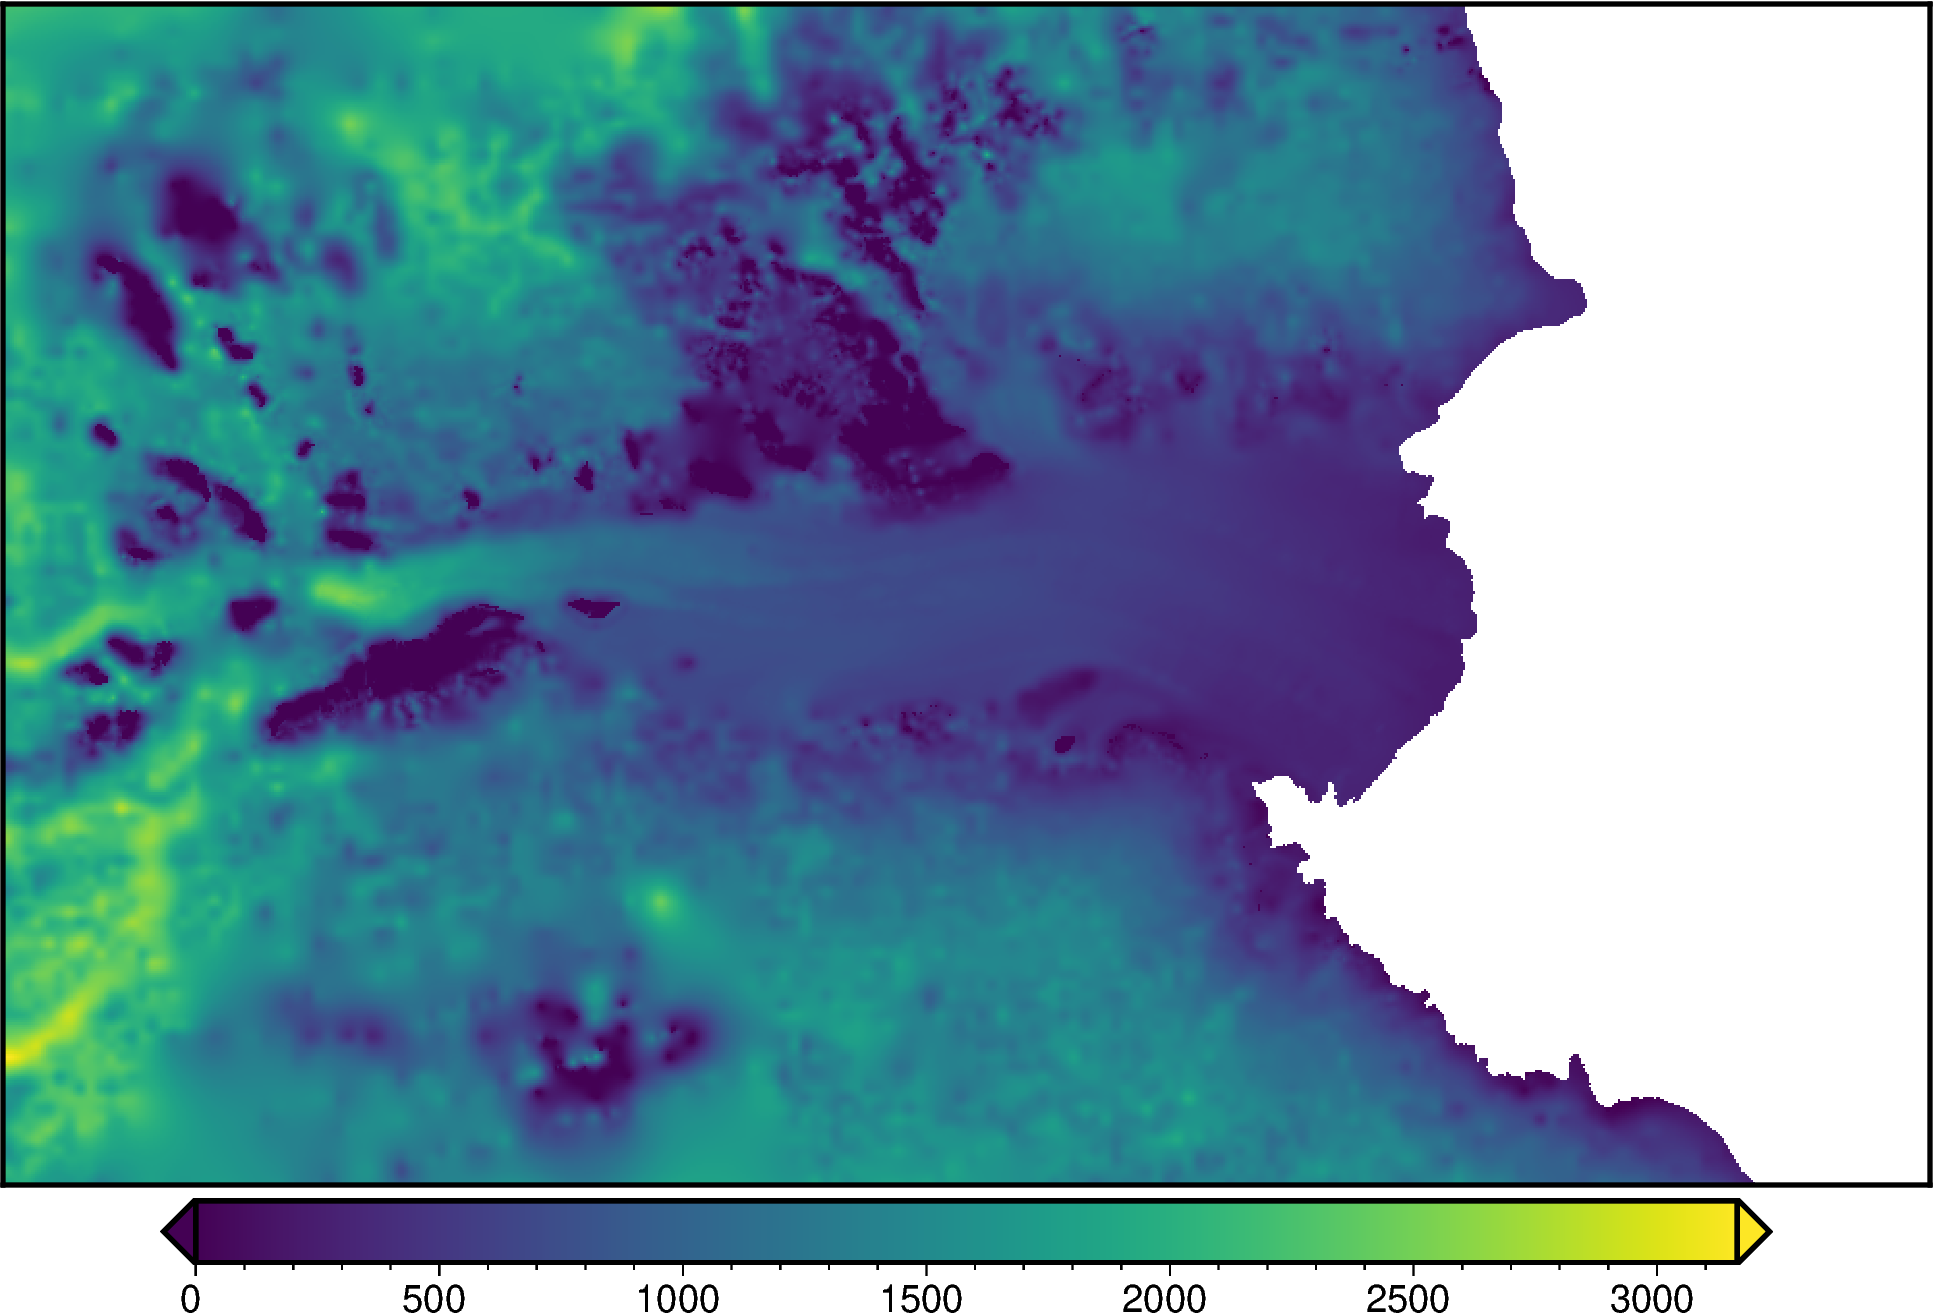

In [4]:
fig = maps.plot_grd(
    ice_thickness,
)

fig.show(dpi=200)

Add some built in map features. Many of these function require projection and region information, which needs to be explicitly supplied. Each of these functions have parameters which can be changed to alter the map, see the API reference for these.

gmtset [WARNING]: Representation of font type not recognized. Using default.


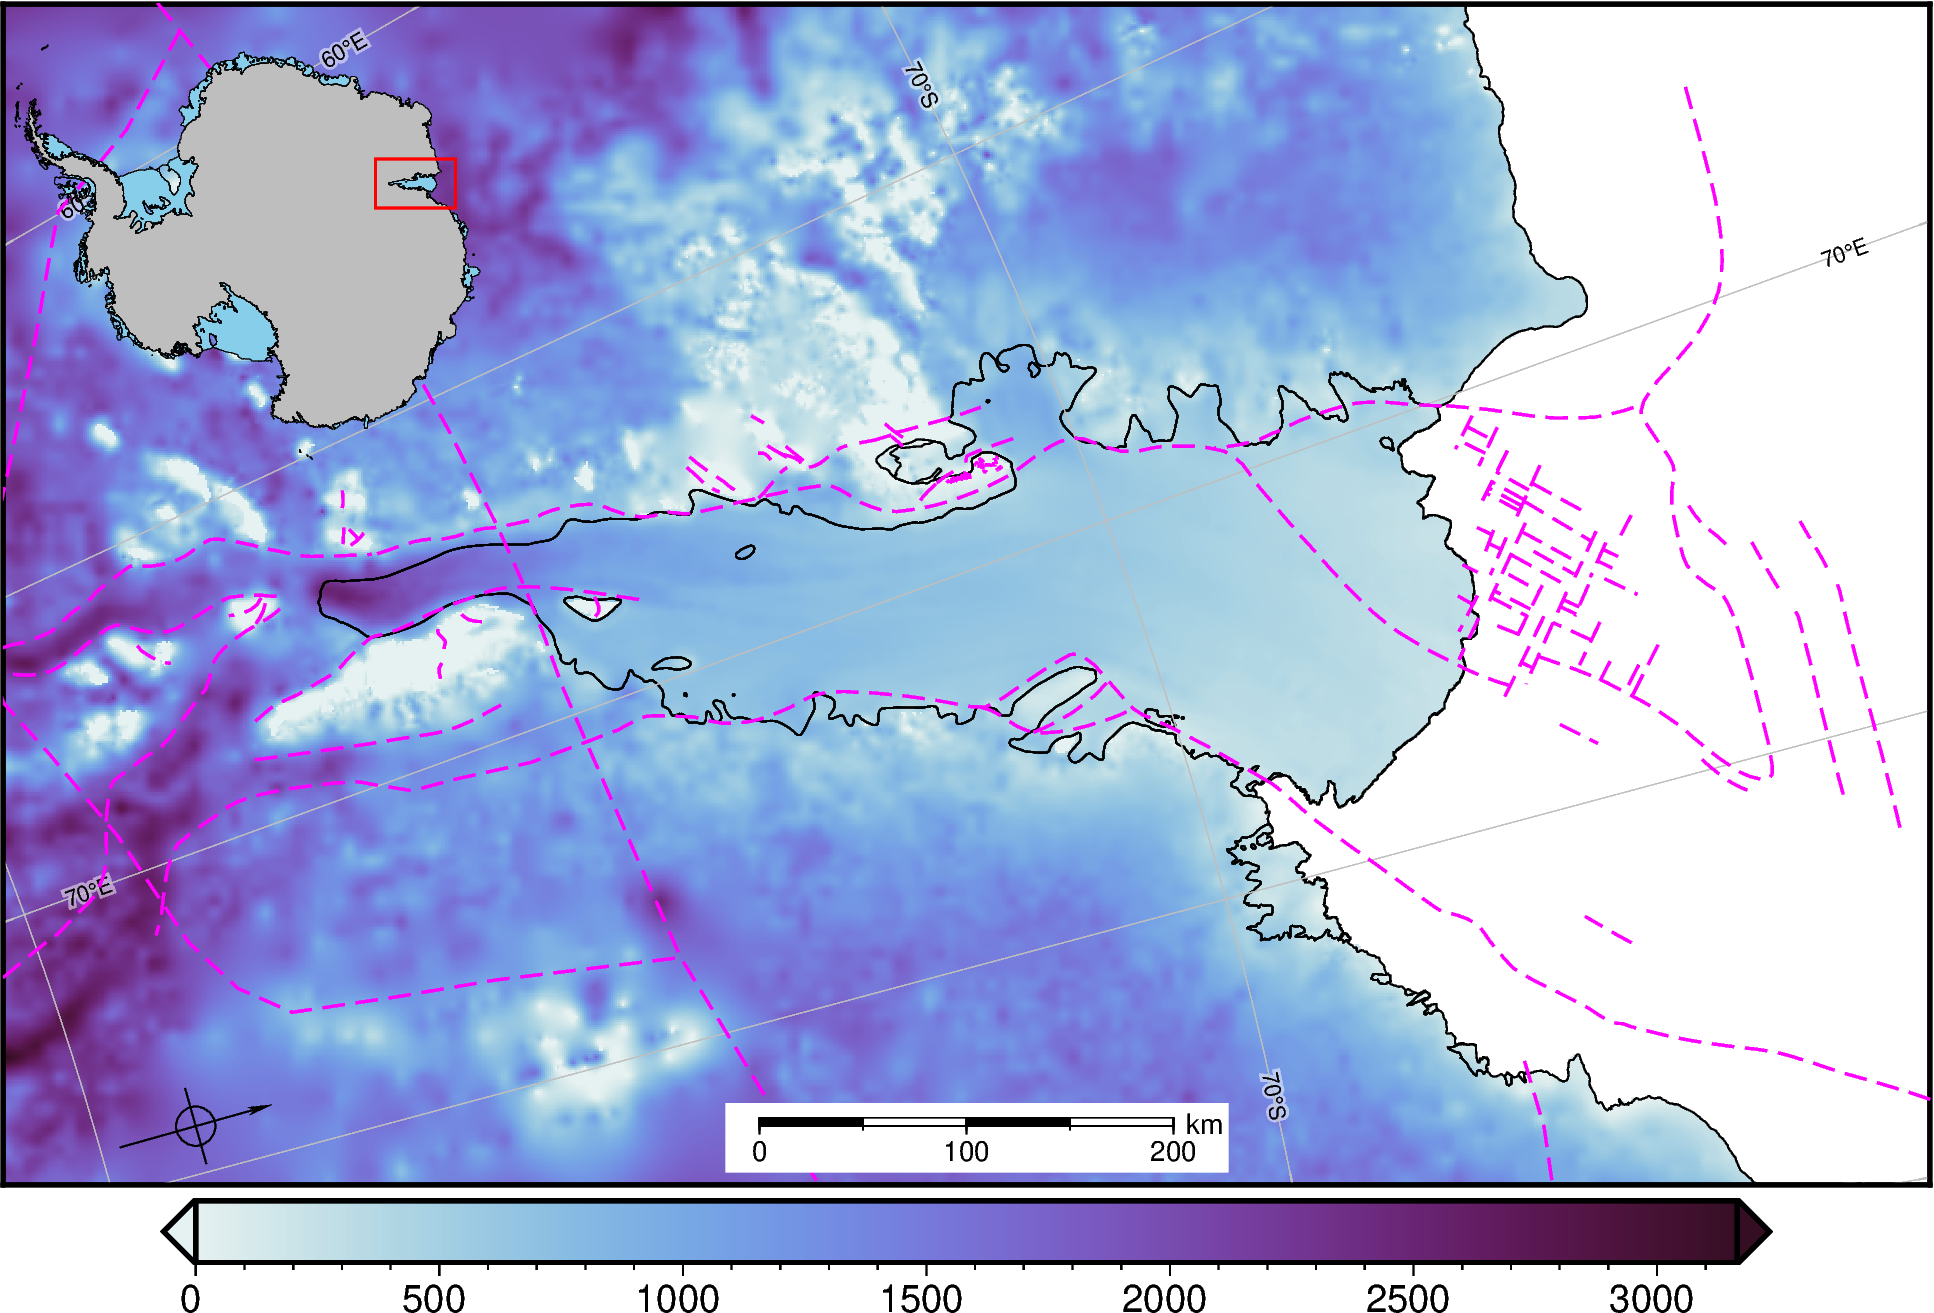

In [5]:
# explicitly set the projection
proj, proj_latlon, fig_width, fig_height = utils.set_proj(
    region=regions.amery_ice_shelf,
)

# plot the basemap
fig = maps.plot_grd(
    ice_thickness,
    cmap="dense",
)

# add the coastline and groundingline
maps.add_coast(fig, projection=proj)

# add some lat/lon lines
maps.add_gridlines(fig, projection=proj_latlon, x_spacing=5, y_spacing=5)

# add some faults
maps.add_faults(fig, projection=proj)

# add an inset map
maps.add_inset(fig)

# add a scale bar
maps.add_scalebar(
    fig,
    projection=proj_latlon,
)

# add a north arrow
maps.add_north_arrow(fig, rose_size="2c")

fig.show(dpi=200)

These can also all be called within the `plot_grd()` function

gmtset [WARNING]: Representation of font type not recognized. Using default.


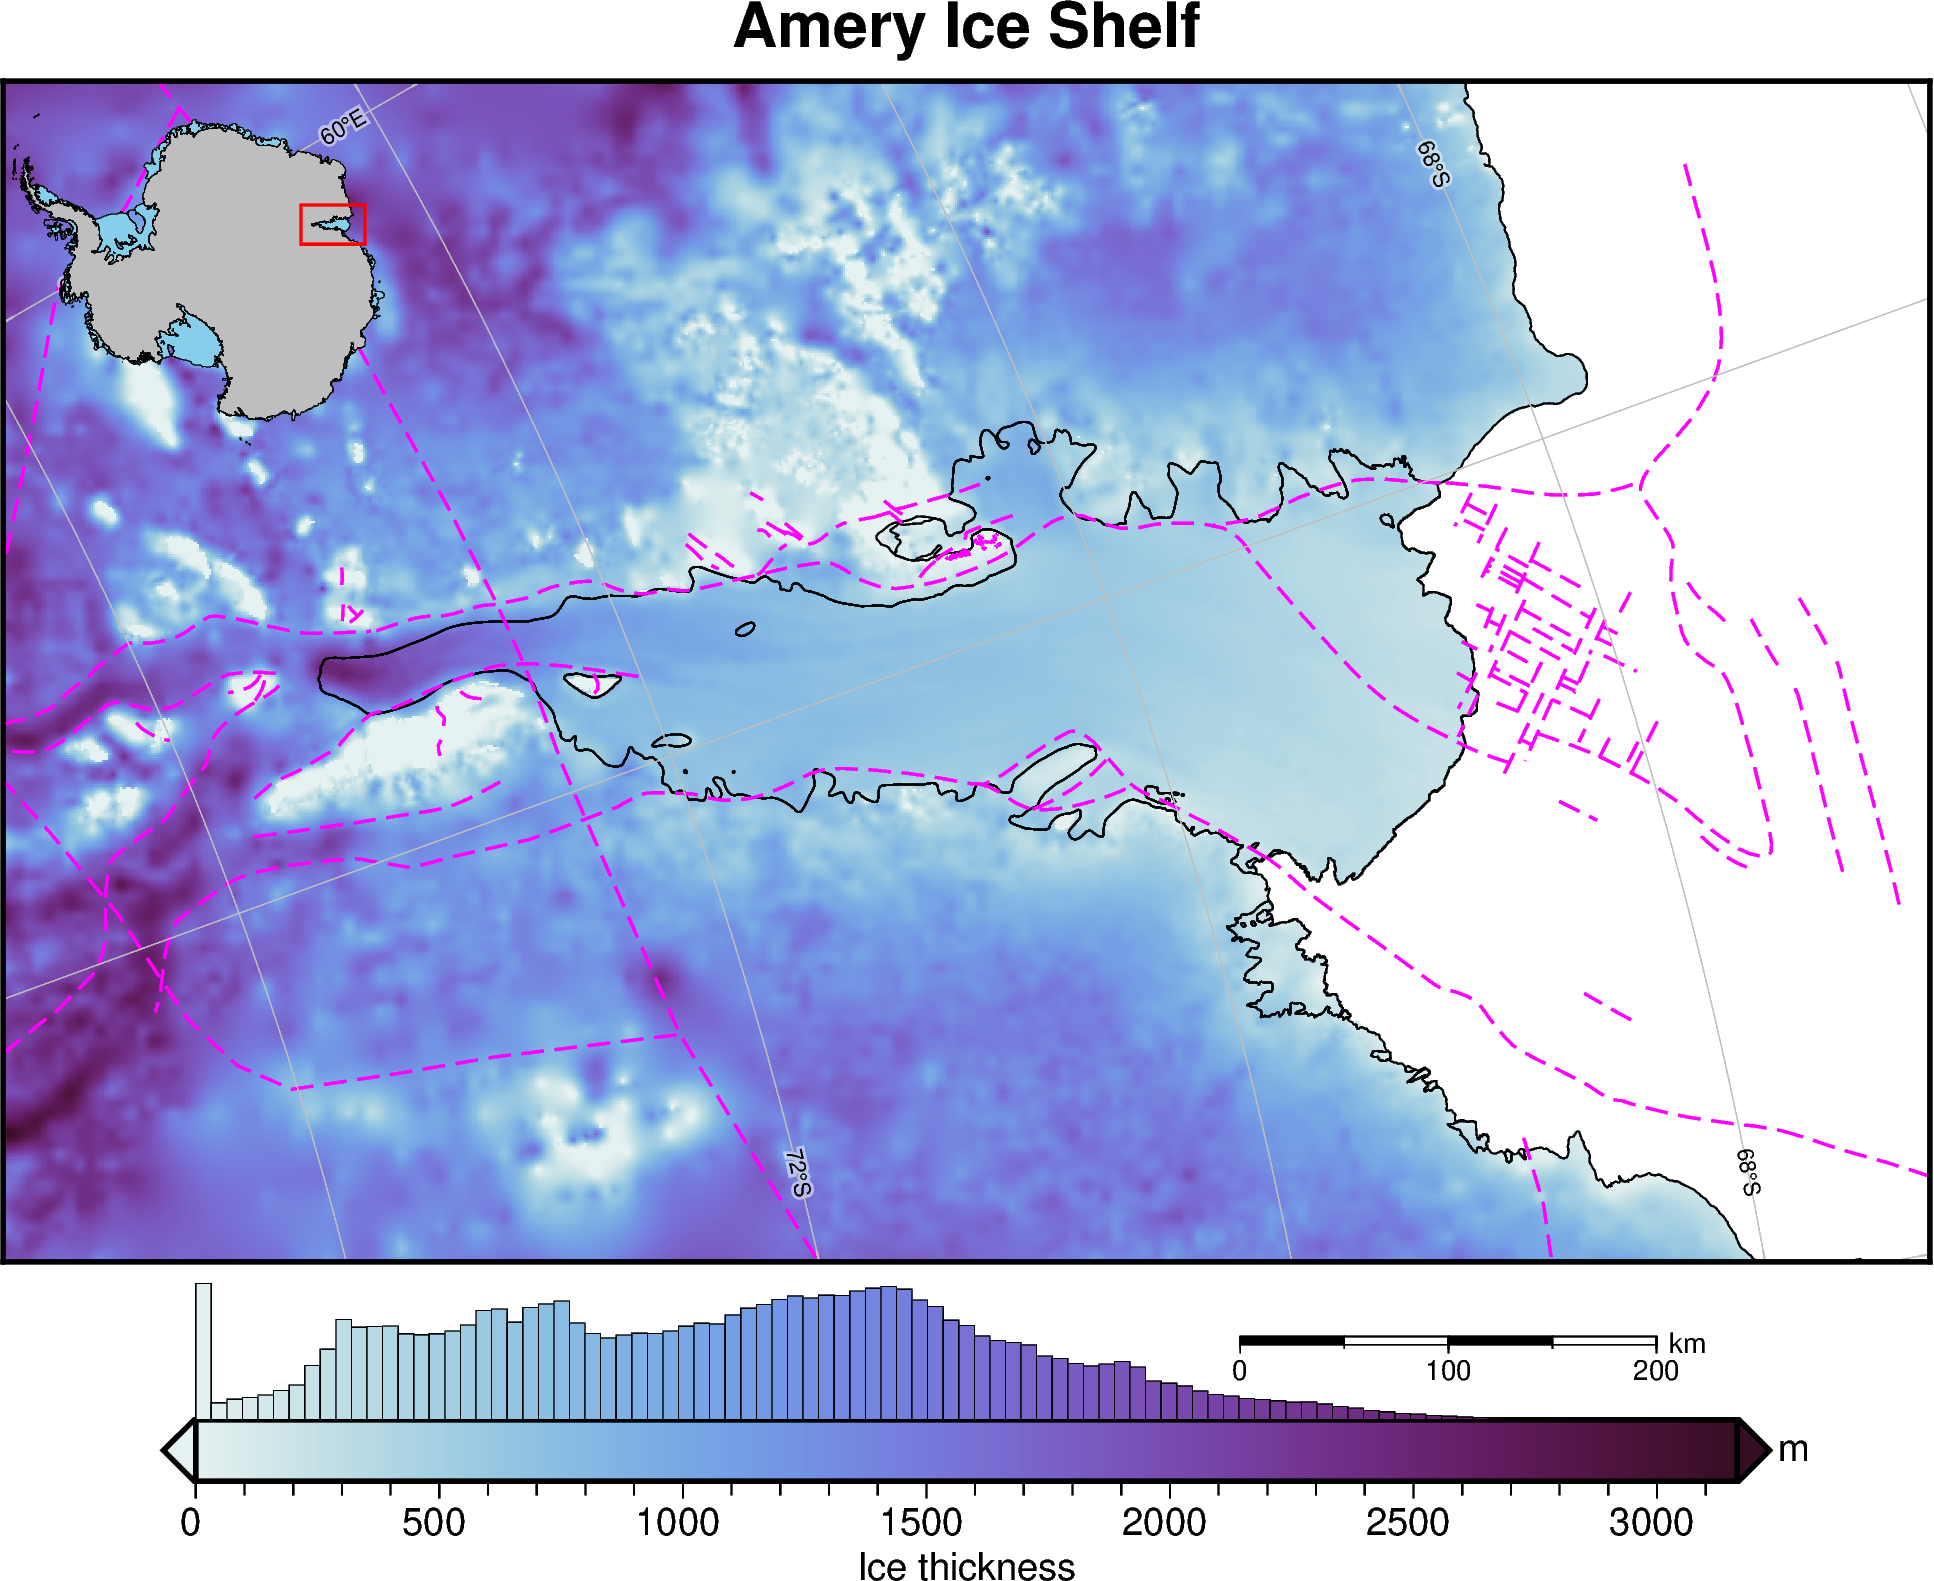

In [6]:
fig = maps.plot_grd(
    ice_thickness,
    cmap="dense",  # set the colormap
    coast=True,
    title="Amery Ice Shelf",
    cbar_label="Ice thickness",  # add label to colorbar
    cbar_unit="m",  # add units to y-axis of colorbar
    faults=True,
    inset=True,  #  add inset map showing location
    inset_width=0.2,  # set width of inset map in percent of total figure width
    scalebar=True,  # add scalebar
    scale_position="n.75/-.07",
    gridlines=True,  # add lat/lon gridlines
    x_spacing=10,  # longitude interval (degrees)
    y_spacing=2,  # latitude interval (degrees)
    hist=True,  # add a histogram to the colorbar
    hist_bin_num=100,  # 100 bins
)

# display the figure
fig.show(dpi=200)